In [18]:
%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np

In [19]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('C:\\Users\\Cristhian\\TEETH-RECOGNITION-WITH-MACHINE-LEARNING\\DATASET - Recortado') if isfile(join('C:\\Users\\Cristhian\\TEETH-RECOGNITION-WITH-MACHINE-LEARNING\\DATASET-Recortado', f))]

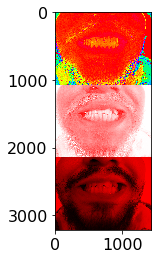

In [8]:
image = cv2.imread('C:\\Users\\Cristhian\\TEETH-RECOGNITION-WITH-MACHINE-LEARNING\\DATASET - Recortado\\101_0237.JPG')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = cv2.resize(image,None,fx=1/3,fy=1/3)
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

images = []
for i in [0, 1, 2]:
    colour = hsv.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 255
    if i != 2: colour[:,:,2] = 255
    images.append(colour)

hsv_stack = np.vstack(images)
rgb_stack = cv2.cvtColor(hsv_stack, cv2.COLOR_HSV2RGB)
plt.imshow(rgb_stack)
#cv2.imwrite("C:\\Users\\Cristhian\\TEETH-RECOGNITION-WITH-MACHINE-LEARNING\\Images_HSV\\"+f,hsv_stack)


(180, 1)
180
(180, 3)


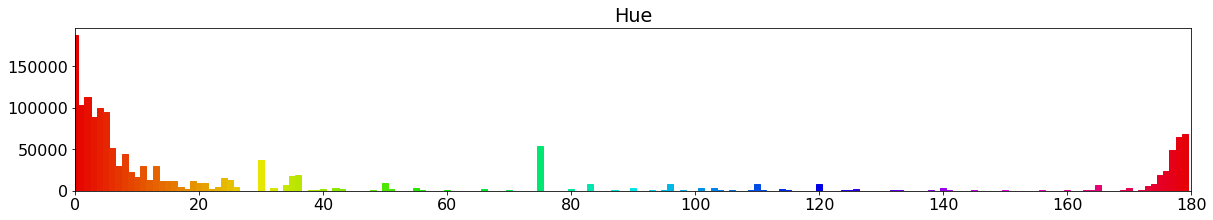

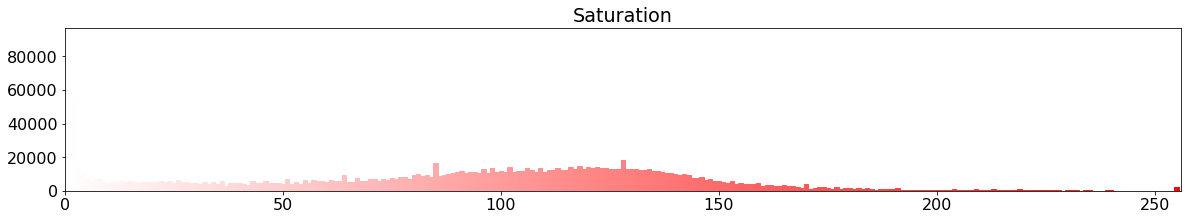

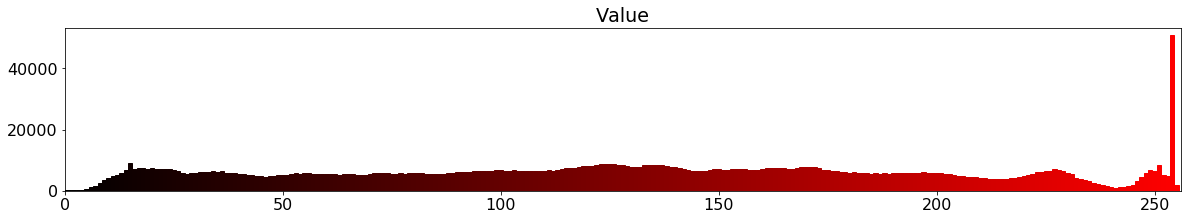

In [9]:
matplotlib.rcParams.update({'font.size': 16})
def show_hsv_hist(image):
    # Hue
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [0], None, [180], [0, 180])
    plt.xlim([0, 180])
    colours = [colors.hsv_to_rgb((i/180, 1, 0.9)) for i in range(0, 180)]
    colours=np.array(colours)
    histr=np.array(histr)
    #print(range(0,180))
    x= list(range(0,180))
    print(histr.shape)
    print(len(x))
    print(colours.shape)
    for i in (x):
        plt.bar(x[i], histr[i], color=colours[i], edgecolor=colours[i], width=1)
        plt.title('Hue')

    # Saturation
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [1], None, [256], [0, 256])
    plt.xlim([0, 256])
    x= list(range(0,256))
    colours = [colors.hsv_to_rgb((0, i/256, 1)) for i in range(0, 256)]
    for i in (x):
        plt.bar(x[i], histr[i], color=colours[i], edgecolor=colours[i], width=1)
        #plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
        plt.title('Saturation')

    # Value
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [2], None, [256], [0, 256])
    plt.xlim([0, 256])
    x=list(range(0,256))
    colours = [colors.hsv_to_rgb((0, 1, i/256)) for i in range(0, 256)]
    for i in (x):
        plt.bar(x[i], histr[i], color=colours[i], edgecolor=colours[i], width=1)
        #plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
        plt.title('Value')
show_hsv_hist(hsv)

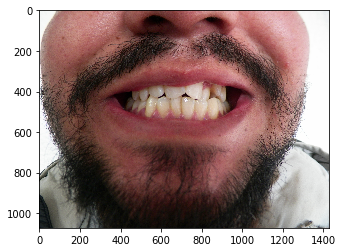

In [20]:
# Blur image slightly
plt.imshow(image)
image_blur = cv2.GaussianBlur(image, (7, 7), 0)
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)
min_red = np.array([10,0,0])
max_red = np.array([40,255,255])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)

In [11]:
def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')

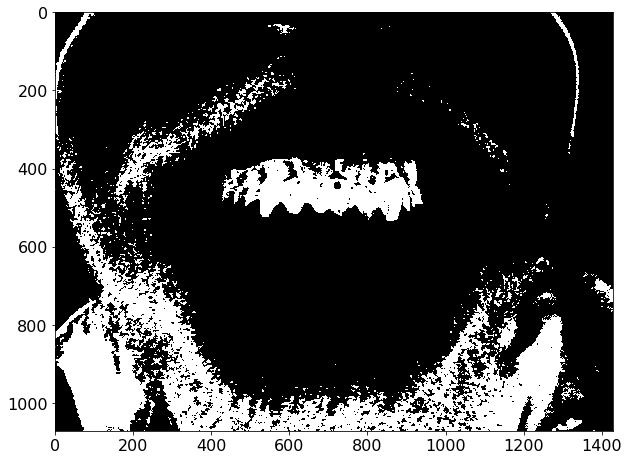

In [12]:
show_mask(image_red1)

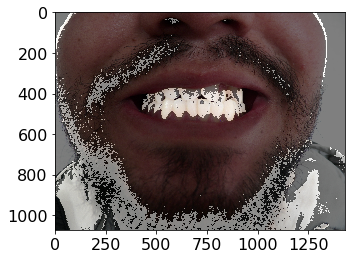

In [13]:
def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    plt.imshow(img)

overlay_mask(image_red1, image)

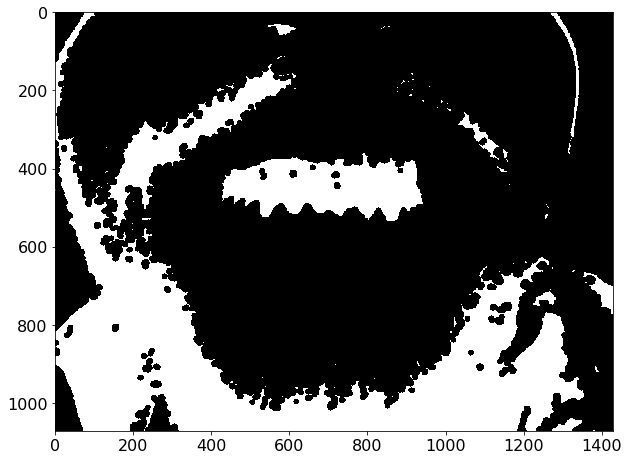

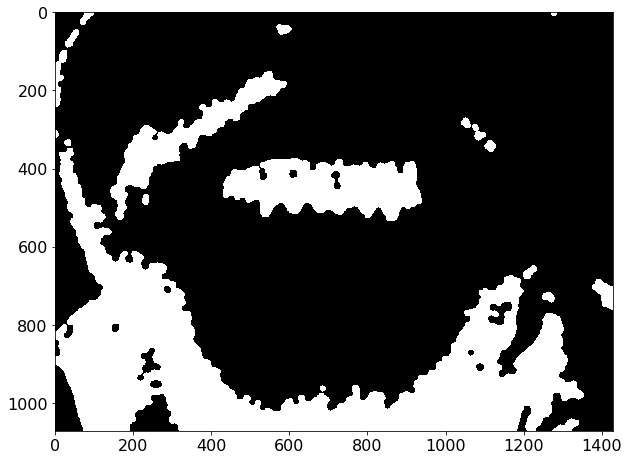

In [16]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

# Fill small gaps
image_red_closed = cv2.morphologyEx(image_red1, cv2.MORPH_CLOSE, kernel)
show_mask(image_red_closed)

# Remove specks
image_red_closed_then_opened = cv2.morphologyEx(image_red_closed, cv2.MORPH_OPEN, kernel)
show_mask(image_red_closed_then_opened)

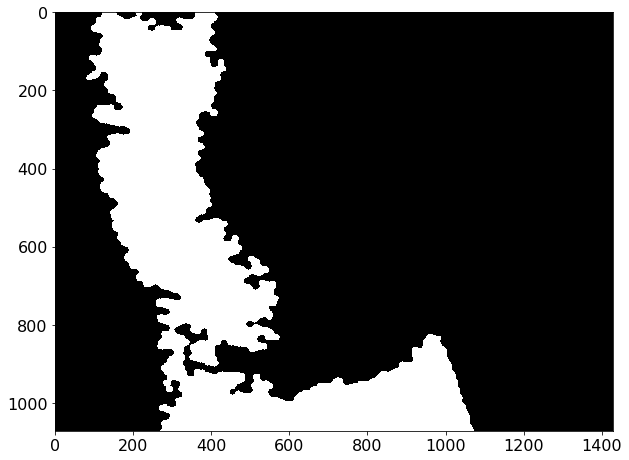

In [58]:
def find_biggest_contour(image):

    # Copy to prevent modification
    image = image.copy()
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Isolate largest contour
    biggest_contour = max(contours, key=cv2.contourArea)

    # Draw just largest contour
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

big_contour, mask = find_biggest_contour(image_red_closed_then_opened)
show_mask(mask)

In [17]:
overlay_mask(mask, image)

NameError: name 'mask' is not defined